<a href="https://colab.research.google.com/github/frag30041997/jupyter-one/blob/master/TP_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import seaborn as sns; sns.set
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder as LE
import numpy as np


def accuracy(preds,target):
  return (preds==target).sum()/len(target)


def show_cm(cm, labels):
    df_cm = pd.DataFrame(cm, labels, labels)
    sns.heatmap(df_cm, annot=True)
    plt.show()

#fonction pour changer tout en int meme le dtype de la colonne
def sci_to_int(d):
  iplist = []
  for i in range(len(d)):
    iplist.append(int(d[i]))
  return iplist

def IP_to_country(ip) :
    try :
        return df_iptocountry.country[(df_iptocountry.lower_bound_ip_address <= ip) & (df_iptocountry.upper_bound_ip_address >= ip)].iloc[0]
    except IndexError :
        return np.NAN

df_fraud = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/Fraud_Data.csv',encoding="ISO-8859-1",engine='python')
df_iptocountry = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/IpAddress_to_Country.csv',encoding="ISO-8859-1",engine='python')

print(df_fraud.shape,df_iptocountry.shape)

(151112, 11) (138846, 3)


#Phase 2 (transfo data)

In [134]:
labenc = LE() #initialisation labelencoder

#iptocountry
df_iptocountry['country'] = labenc.fit_transform(df_iptocountry['country']) 
df_iptocountry['lower_bound_ip_address'] = sci_to_int(df_iptocountry['lower_bound_ip_address'])

#fraud
df_fraud['source'] = labenc.fit_transform(df_fraud['source'])
df_fraud['browser'] = labenc.fit_transform(df_fraud['browser'])
df_fraud['device_id'] = labenc.fit_transform(df_fraud['device_id'])
df_fraud['purchase_time'] = pd.to_datetime(df_fraud['purchase_time'])
df_fraud['signup_time'] = pd.to_datetime(df_fraud['signup_time'])
df_fraud['ip_address'] = sci_to_int(df_fraud['ip_address'])

df_fraud.sex = df_fraud['sex'].astype('category').cat.codes

df_iptocountry.info(),df_fraud.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   lower_bound_ip_address  138846 non-null  int64
 1   upper_bound_ip_address  138846 non-null  int64
 2   country                 138846 non-null  int64
dtypes: int64(3)
memory usage: 3.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  int64         
 5   source          151112 non-null  int64         
 6   browser         151112 non-null  int64         
 7  

(None, None)

In [135]:
df_merge = df_fraud.drop(['purchase_time','signup_time'],axis=1)

In [136]:
df_iptocountry.info(),df_fraud.info(),df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   lower_bound_ip_address  138846 non-null  int64
 1   upper_bound_ip_address  138846 non-null  int64
 2   country                 138846 non-null  int64
dtypes: int64(3)
memory usage: 3.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  int64         
 5   source          151112 non-null  int64         
 6   browser         151112 non-null  int64         
 7  

(None, None, None)

In [137]:
df_merge["IP_country"] = df_fraud.ip_address.apply(IP_to_country)

In [138]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   purchase_value  151112 non-null  int64  
 2   device_id       151112 non-null  int64  
 3   source          151112 non-null  int64  
 4   browser         151112 non-null  int64  
 5   sex             151112 non-null  int8   
 6   age             151112 non-null  int64  
 7   ip_address      151112 non-null  int64  
 8   class           151112 non-null  int64  
 9   IP_country      129146 non-null  float64
dtypes: float64(1), int64(8), int8(1)
memory usage: 10.5 MB


In [139]:
"""merge_device_usage_dataset = pd.merge(df_fraud,
                                      df_iptocountry.iloc[:,[0,2,4]],
                                      left_on='use_id', right_on='use_id')"""

"merge_device_usage_dataset = pd.merge(df_fraud,\n                                      df_iptocountry.iloc[:,[0,2,4]],\n                                      left_on='use_id', right_on='use_id')"

In [140]:
df_merge = df_merge.dropna()
print(df_merge.head(5))
print(df_merge.info())

   user_id  purchase_value  device_id  ...  ip_address  class  IP_country
0    22058              34      89215  ...   732758368      0       104.0
1   333320              16      24078  ...   350311387      0       223.0
2     1359              15     131216  ...  2621473820      1       223.0
4   221365              39      68757  ...   415583117      0       223.0
5   159135              42       2322  ...  2809315199      0        36.0

[5 rows x 10 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 129146 entries, 0 to 151110
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         129146 non-null  int64  
 1   purchase_value  129146 non-null  int64  
 2   device_id       129146 non-null  int64  
 3   source          129146 non-null  int64  
 4   browser         129146 non-null  int64  
 5   sex             129146 non-null  int8   
 6   age             129146 non-null  int64  
 7   ip_

In [141]:
#Isolation
#target_feature_name = 'target_feature'

###
#note pour benj : j'ai pas fais faire les meilleurs hyperparametres, trop long pour mon charbon
###

target= 'class'
y = df_merge[target]
x = df_merge.drop(columns=target)


splits = train_test_split(x,y, train_size=0.55,stratify=y,random_state=100) #separe le dataset en deux parties 1 pour entrainement a la prediction et l'autre pour le test operationnel
                                              # stratify important car permet de récolter des reponses a comparer auxprediction de manière a tester le plus de cas possibles ( empeche de prendre ici que 1,2 ou 3 en réponse)

x_train = splits[0]
x_test = splits[1]
y_train = splits[2]
y_test = splits[3]

#Pipeline
pipeline_details = [('PCA', PCA(random_state=1337)),
                    ('RF', RF())]
pipeline = Pipeline(steps=pipeline_details)

#GridSearchCV
hyperparameters = {}
hyperparameters['PCA__n_components'] = [i for i in range(1, x_train.shape[1]+1,3)]
hyperparameters['RF__n_estimators']  = [i for i in range(70,150+1,20)]
print(hyperparameters)

#hyperparameter_search = GridSearchCV(pipeline, hyperparameters, scoring='accuracy', cv=5)

#hyperparameter_search.fit(x_train, y_train)

#print('Meilleur score : {:.5f}'.format(hyperparameter_search.best_score_))
#print('Meilleur paramètres : {}'.format(hyperparameter_search.best_params_))

{'PCA__n_components': [1, 4, 7], 'RF__n_estimators': [70, 90, 110, 130, 150]}


In [142]:
x_train

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,IP_country
123993,178982,69,74407,1,0,0,28,388127216,223.0
98350,370473,47,89927,0,1,1,40,1121782376,223.0
12592,19748,28,57543,0,0,1,33,1514212031,70.0
75992,356828,38,83613,1,3,0,33,2090984315,42.0
103872,259687,50,17541,2,0,1,29,2199576139,223.0
...,...,...,...,...,...,...,...,...,...
22823,317530,44,99114,2,1,0,26,2937342826,42.0
145972,379203,87,59792,1,0,0,40,1161104083,223.0
98348,273418,33,15906,0,0,1,34,2639098283,104.0
84383,227441,42,117941,0,0,0,23,2689697058,223.0


In [145]:
rf = RF(n_estimators=110)
rf.fit(x_train, y_train)
print(rf.feature_importances_)

[0.16736601 0.13664267 0.21255899 0.03117582 0.02927011 0.01747251
 0.11889642 0.20925682 0.07736065]


In [144]:
#PCA
"""
best_param_PCA = hyperparameter_search.best_params_['PCA__n_components']
pca = PCA(n_components=best_param_PCA)
pca.fit(x_train)
x_train_PCA = pca.transform(x_train)
x_test_PCA = pca.transform(x_test)
"""

#RF
#N=hyperparameter_search.best_params_['RF__n_estimators']
rf = RF(n_estimators=110)
rf.fit(x_train, y_train)

#Accuracy
preds = rf.predict(x_test)
print('Accuracy : ',accuracy(preds, y_test)*100,'%')


Accuracy :  94.35095326588203 %


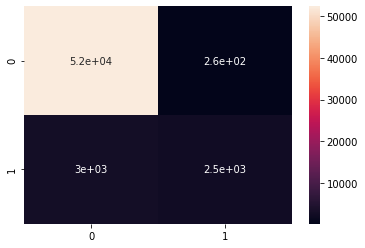

In [146]:
#Confusion Matrix
y_classifie = y.astype('category').cat.categories.tolist()
cm_train = confusion_matrix(y_test,y_pred=preds,labels=y_classifie)
show_cm(cm_train, y_classifie)